# Загрузка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('athletes.csv')

In [ ]:
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


# Обрабтка данных

## Поиск и замена пустых значений

In [ ]:
round(df.isna().mean() * 100,2)

,0
id,0.00
name,0.00
nationality,0.00
sex,0.00
dob,0.01
height,2.86
weight,5.71
sport,0.00
gold,0.00
silver,0.00


Имеется небольшое количество пустых значений. \
Рост и вес заменю на медиану в соответствующем признаке. \

In [ ]:
df['weight'] = df['weight'].fillna(df['weight'].median())
df['height'] = df['height'].fillna(df['height'].median())

In [ ]:
df[df.dob.isna()]

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
8546,663676373,Pavel Sozykin,RUS,male,NaN,1.76,70.0,sailing,0,0,0


Пустое значение у одного спортсмена заполню данными из открытых источников.

https://clck.ru/3EiRGG
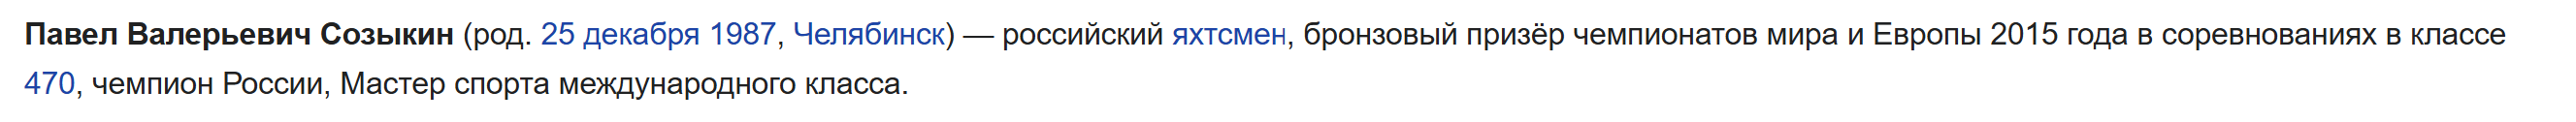

In [ ]:
df['dob'] = df['dob'].fillna('12/25/87')

In [ ]:
bool(df.isna().sum().sum()) # проверка на наличие пустых ячеек

False

## Преобразование категориальных признаков

Удаляю имя, т.к для идентификации спортсмена есть id

In [ ]:
df = df.drop(columns='name')

In [ ]:
df.head()

,id,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


В дате рождения оставляю только год, приводя значение к int.

In [ ]:
df.dob =  df.dob.str[-2:].astype(int)

In [ ]:
df.head()

,id,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,ESP,male,69,1.72,64.0,athletics,0,0,0
1,532037425,KOR,female,86,1.68,56.0,fencing,0,0,0
2,435962603,CAN,male,92,1.98,79.0,athletics,0,0,1
3,521041435,MDA,male,91,1.83,80.0,taekwondo,0,0,0
4,33922579,NZL,male,90,1.81,71.0,cycling,0,0,0


К оставшимся признакам применяю Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
object_columns = object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['nationality', 'sex', 'sport'], dtype='object')

In [ ]:
for col in object_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df.head()

,id,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,59,1,69,1.72,64.0,2,0,0,0
1,532037425,102,0,86,1.68,56.0,9,0,0,0
2,435962603,33,1,92,1.98,79.0,2,0,0,1
3,521041435,119,1,91,1.83,80.0,22,0,0,0
4,33922579,141,1,90,1.81,71.0,7,0,0,0


Создаю целеву переменную - пол

In [ ]:
x = df.drop(columns='sex')
y = df.sex

# Создание модели логистической регрессии

## Разделение на обучающее и тестовое  подмножества

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, train_size=0.8, random_state=1)

## Обучение модели

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(x_train,y_train)

LogisticRegression()

# ROC curve sklearn

## Построение ROC-кривой с помощью функции sklearn.metrics. roc_curve

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
y_score = log_model.predict_proba(x_test)

In [ ]:
fpr_sk, tpr_sk, thresholds = roc_curve(y_test, y_score[:,1])

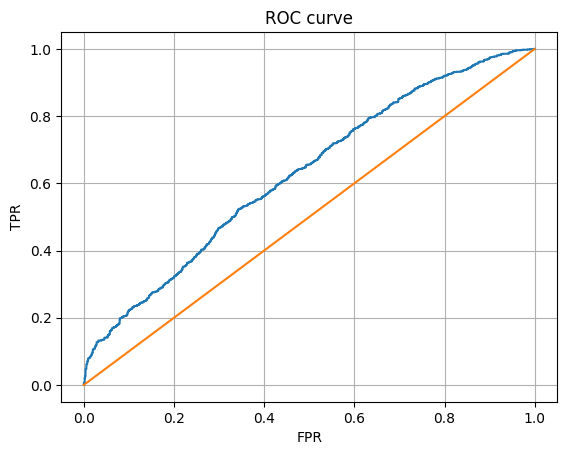

In [ ]:
plt.plot(fpr_sk, tpr_sk)
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10))

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.grid()

## Значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test, y_score[:,1])

0.6265172022684309

# Подсчет метрик TPR, FPR «вручную»

## ROC-кривая с помощью вычисленных метрик

In [ ]:
thresholds = [i  for i in np.arange(0.01, 1, 0.01)]
fpr_list = []
tpr_list = []

for threshold in thresholds:
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative

    for predicted_prob, actual in zip(y_score[:, 1], y_test):
        predicted = 1 if predicted_prob >= threshold else 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1

    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0 #TPR
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0 #FPR

    fpr_list.append(fpr)
    tpr_list.append(tpr)

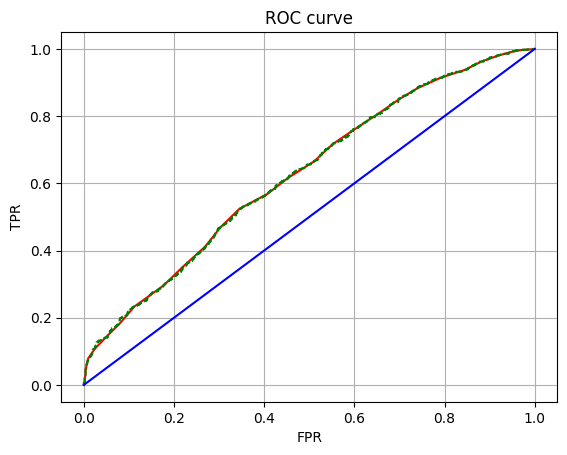

In [ ]:
plt.plot(fpr_list, tpr_list,color='r')
plt.plot(fpr_sk, tpr_sk,color='g',linestyle='--')
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10),color='b')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.grid()

plt.show()

В данном случае ROC кривая из библиотеки ровно накладывается на кривую созданую ручным методом.

# График Precision-Recall

In [ ]:
thresholds = [i  for i in np.arange(0.1, 1, 0.001)]
p_list = []
r_list = []

for threshold in thresholds:
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative

    for predicted_prob, actual in zip(y_score[:, 1], y_test):
        predicted = 1 if predicted_prob >= threshold else 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1

    p = tp / (tp + fp) if (tp + fp) > 0 else 0
    r = tp / (tp + fn) if (tp + fn) > 0 else 0

    p_list.append(p)
    r_list.append(r)

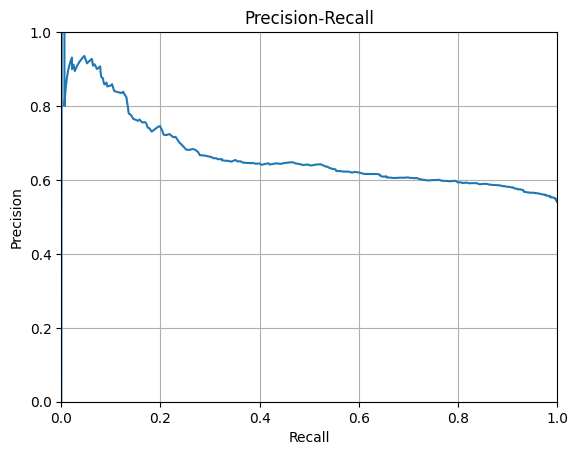

In [ ]:
plt.plot(r_list, p_list)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall')
plt.grid()

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

# Значение ROC-AUC метрики для ручного метода

In [ ]:
from sklearn.metrics import auc

In [ ]:
auc(fpr_list, tpr_list)

0.6267716446124764

Отличий по данной метрике нет.

# Выводы

По графикам заметно, что модель предсказывает лучше чем случайное угадывание.
Однако, не сильно отличается от него.Это можно понять по AUC score = 0.62.

ROC кривая не может быть ниже диагонали (50%). Просто потому что предсказания ниже этого порога инвертируются и снова становятся выше 50%